Consider the following network:
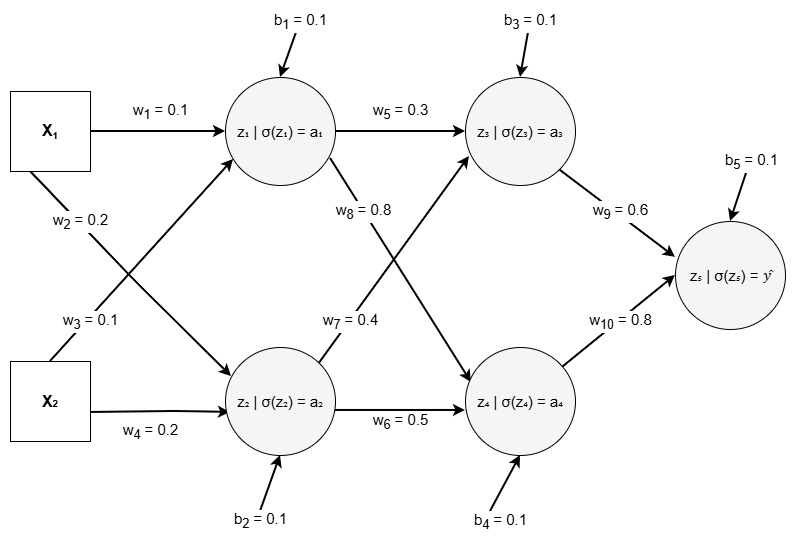

**Dataset:**

\begin{array}{|c|c|c|}
\hline
x1 & x2 & y \\
\hline
0 & 0 & 0 \\
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 0 \\
\hline
\end{array}

---


The sigmoid function is given by:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

First order derivative of this function is:
$$
\sigma'(z) = \sigma(z) \left( 1 - \sigma(z) \right)
$$


---


Now, consider the Loss Function below:
$$
\text{E}(y, \hat{y}) = \frac{1}{2} (\hat{y}_i - y_i)^2
$$



In [1]:
import numpy as np

class MLP:
    def __init__(self):
        # Define the architecture of the MLP
        self.input_size = 2          # Number of input features (x)
        self.hidden_size1 = 2        # Number of neurons in the first hidden layer
        self.hidden_size2 = 2        # Number of neurons in the second hidden layer
        self.output_size = 1         # Number of output neurons (y)

        # ---------------------------------------------------------
        # Initialize weight matrices using the declared sizes
        # ---------------------------------------------------------
        self.weights1 = np.zeros((self.input_size, self.hidden_size1))
        self.bias1    = np.zeros((1, self.hidden_size1))

        self.weights2 = np.zeros((self.hidden_size1, self.hidden_size2))
        self.bias2    = np.zeros((1, self.hidden_size2))

        self.weights3 = np.zeros((self.hidden_size2, self.output_size))
        self.bias3    = np.zeros((1, self.output_size))

        # -----------------------------------------------------------
        # Manually assign the initial values according to the figure
        # -----------------------------------------------------------
        self.weights1[:] = [[0.1, 0.2],
                            [0.1, 0.2]]
        self.bias1[:] = [[0.1, 0.1]]

        self.weights2[:] = [[0.3, 0.8],
                            [0.4, 0.5]]
        self.bias2[:] = [[0.1, 0.1]]

        self.weights3[:] = [[0.6],
                            [0.8]]
        self.bias3[:] = [[0.1]]

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))   ## implement the sigmoid function here

    def forward(self, x):
        # Forward pass through the network
        self.hidden_layer1_input = np.dot(x, self.weights1) + self.bias1 # replace None with the appropriate formula [Hint: you can use np.dot()]
        self.hidden_layer1_output = self.sigmoid(self.hidden_layer1_input)

        self.hidden_layer2_input = np.dot(self.hidden_layer1_output, self.weights2) + self.bias2 # replace None with the appropriate formula [Hint: you can use np.dot()]
        self.hidden_layer2_output = self.sigmoid(self.hidden_layer2_input)

        output_layer_input = np.dot(self.hidden_layer2_output, self.weights3) + self.bias3 # replace None with the appropriate formula [Hint: you can use np.dot()]
        self.predicted_output = self.sigmoid(output_layer_input)

        return self.predicted_output

    def backward(self, x, y, learning_rate=0.1):
        # Backward pass to compute gradients and update weights

        # Compute gradients for output layer
        error = self.predicted_output - y
        output_layer_gradient = error * (self.predicted_output * (1 - self.predicted_output))

        # Update weights and biases of output layer
        delta_weights3 = np.dot(self.hidden_layer2_output.T, output_layer_gradient) # replace None with the appropriate formula [Hint: you can use np.dot()]
        delta_bias3 = np.sum(output_layer_gradient, axis=0, keepdims=True) # replace None with the appropriate formula

        self.weights3 -= learning_rate * delta_weights3
        self.bias3 -= learning_rate * delta_bias3

        # Compute gradients for second hidden layer
        hidden_layer2_gradient = np.dot(output_layer_gradient, self.weights3.T) * \
                                 (self.hidden_layer2_output * (1 - self.hidden_layer2_output))

        # Update weights and biases of second hidden layer
        delta_weights2 = np.dot(self.hidden_layer1_output.T, hidden_layer2_gradient) # replace None with the appropriate formula
        delta_bias2 = np.sum(hidden_layer2_gradient, axis=0, keepdims=True) # replace None with the appropriate formula

        self.weights2 -= learning_rate * delta_weights2
        self.bias2 -= learning_rate * delta_bias2

        # Compute gradients for first hidden layer
        hidden_layer1_gradient = np.dot(hidden_layer2_gradient, self.weights2.T) * \
                                 (self.hidden_layer1_output * (1 - self.hidden_layer1_output))

        # Update weights and biases of first hidden layer
        delta_weights1 = np.dot(x.T, hidden_layer1_gradient)
        delta_bias1 = np.sum(hidden_layer1_gradient, axis=0, keepdims=True)

        self.weights1 -= learning_rate * delta_weights1
        self.bias1 -= learning_rate * delta_bias1

    def train(self, X, y, epochs=100000, learning_rate=0.1):
        # Training the MLP
        for epoch in range(epochs+1):
            for i in range(len(X)):
                x_input = X[i].reshape(1, -1)  # Reshape input for single sample
                target = y[i]

                # Forward pass
                output = self.forward(x_input) # replace None with appropriate variable

                # Backward pass
                self.backward(x_input, target, learning_rate) # replace None with appropriate variable(s)

            if epoch % 10000 == 0:
                loss = np.mean(np.square(self.predict(X) - y))
                print(f"Epoch {epoch}, Loss: {loss:.4f}")


    def predict(self, X):
        # Make predictions using the trained model
        predictions = []
        for i in range(len(X)):
            x_input = X[i].reshape(1, -1)  # Reshape input for single sample
            output = self.forward(x_input) # replace None with appropriate method call
            predictions.append(output[0, 0])  # Append the predicted output
        return np.array(predictions)


X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Initialize and train the MLP
mlp = MLP()
mlp.train(X, y, epochs = 100000, learning_rate=0.1)

# Make predictions
predictions = mlp.predict(X)
print("Predictions:", predictions)

Epoch 0, Loss: 0.3028
Epoch 10000, Loss: 0.2499
Epoch 20000, Loss: 0.2009
Epoch 30000, Loss: 0.1674
Epoch 40000, Loss: 0.0036
Epoch 50000, Loss: 0.0009
Epoch 60000, Loss: 0.0005
Epoch 70000, Loss: 0.0004
Epoch 80000, Loss: 0.0003
Epoch 90000, Loss: 0.0002
Epoch 100000, Loss: 0.0002
Predictions: [0.01514932 0.98708561 0.98707801 0.01316998]
